In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = True
theme, cs = rp.mpl_setup(is_dark)

In [2]:
%cd ~/cdv/

/home/nmiklaucic/cdv


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
dataset = 'mptrj'

import json
with open(f'precomputed/{dataset}/raw_metadata.json', 'r') as f:
    metadata = json.load(f)
    
df = pd.read_feather(f'precomputed/{dataset}/energy_data.feather')
df

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,energy,total_energy
0,0.0,256.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.930647,-2157.136107
1,0.0,0.0,0.0,4.0,48.0,16.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.337653,-528.311000
2,0.0,0.0,0.0,0.0,32.0,0.0,0.0,30.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.341242,-405.839515
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.286985,-227.210224
4,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.164886,-247.914516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580390,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.651516,-53.212124
1580391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.189344,-43.136065
1580392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.541301,-45.247804
1580393,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.006537,-8.026150


In [4]:
from pymatgen.core import Element

symbols = [Element.from_Z(z).symbol for z in metadata['atomic_numbers'][1:]]

df.columns = ['0', *symbols, 'energy', 'total_energy']
df

,0,C,Cl,Li,O,P,Sb,Mg,Fe,Cu,...,Pa,Lu,Pm,Xe,Ac,Ne,He,Ar,energy,total_energy
0,0.0,256.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.930647,-2157.136107
1,0.0,0.0,0.0,4.0,48.0,16.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.337653,-528.311000
2,0.0,0.0,0.0,0.0,32.0,0.0,0.0,30.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.341242,-405.839515
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.286985,-227.210224
4,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.164886,-247.914516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580390,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.651516,-53.212124
1580391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.189344,-43.136065
1580392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.541301,-45.247804
1580393,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.006537,-8.026150


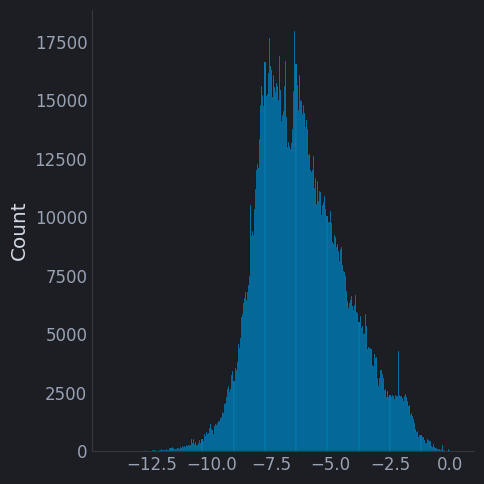

In [5]:
num_atoms = df.iloc[:, :-2].sum(axis=1)
y = df['energy'].values

X = df.iloc[:, :-2]

sns.displot(y)

In [6]:
import os
os.environ['KERAS_BACKEND'] = 'jax'

import keras
from keras import layers
from keras import ops

import tensorflow_probability.substrates.jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

y_global = y
global_shift = np.median(y_global)
global_scale = np.mean(np.abs(y_global - global_shift))
print(global_shift, global_scale)
print(tfd.Laplace(global_shift, global_scale).log_prob(y_global).mean())

# global_shift = 0
# global_scale = 1
transform = ops.softplus
inv_transform = lambda x: ops.log(ops.expm1(x))

intercept = inv_transform(1)
# transform = ops.exp
# inv_transform = ops.log


class SpeciesEnergyModel(keras.Model):
    """Models mean and MAE of each element's energy."""
    def __init__(self):
        super().__init__()
        self.shift = layers.Dense(1, kernel_initializer='zeros', use_bias=False, kernel_regularizer=keras.regularizers.l2(1e-6))
        self.scale = layers.Dense(1, kernel_initializer='ones', use_bias=False, kernel_regularizer=keras.regularizers.l2(1e-6))
        self.global_shift = self.add_weight((1,), lambda shape, dtype: global_shift * keras.initializers.Ones()(shape, dtype), trainable=True)
        self.global_scale = self.add_weight((1,), lambda shape, dtype: inv_transform(global_scale) * keras.initializers.Ones()(shape, dtype), trainable=True)

        self.built = True

    def predict_dist(self, X):
        num_atoms = ops.sum(X, axis=-1, keepdims=False)
        shift = self.shift(X).reshape(-1) / num_atoms
        scale = transform(self.scale(X).reshape(-1)) / num_atoms
        # scale = 1
        return tfd.Laplace(shift + self.global_shift, scale * transform(self.global_scale))

    def call(self, Xy):
        X, y = Xy
        dist = self.predict_dist(X)
        return -dist.log_prob(y.reshape(-1))
    

mod = SpeciesEnergyModel()

out = mod([X[:64], y[:64]])
print(out.shape, out.reshape(-1).round(5))

2024-10-13 16:20:07.303751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 16:20:07.315222: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 16:20:07.318727: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-13 16:20:07.916397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


-6.41029746890625 1.4696701343405794


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/home/nmiklaucic/minicon

-2.078185
(64,) [2.11267   1.70918   1.12517   2.52294   1.9255899 3.1094599 1.49375
 2.30333   1.51868   1.56864   2.3969898 2.52258   1.48611   1.9398199
 1.88471   1.8768    1.26615   1.6122899 1.30781   1.59692   3.78839
 2.5418298 2.68859   1.71309   1.73578   2.76396   1.80853   1.6878899
 3.3725998 1.44504   1.44875   2.50774   1.70881   1.2046499 1.7731099
 2.23341   1.21161   2.16605   1.7280899 1.8937399 2.83827   2.39829
 2.5225198 1.4859899 1.9305199 1.88465   1.9533399 1.27307   1.61258
 3.8357298 1.68993   2.13903   2.5434198 3.20398   2.85976   1.7351899
 2.76382   1.80063   3.9584599 2.3297698 1.44716   1.4437    2.5076098
 1.7083199]


Epoch 1/5
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.9871 - val_loss: 0.8586
Epoch 2/5
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8439 - val_loss: 0.8512
Epoch 3/5
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8369 - val_loss: 0.8406
Epoch 4/5
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8310 - val_loss: 0.8343
Epoch 5/5
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8252 - val_loss: 0.8298


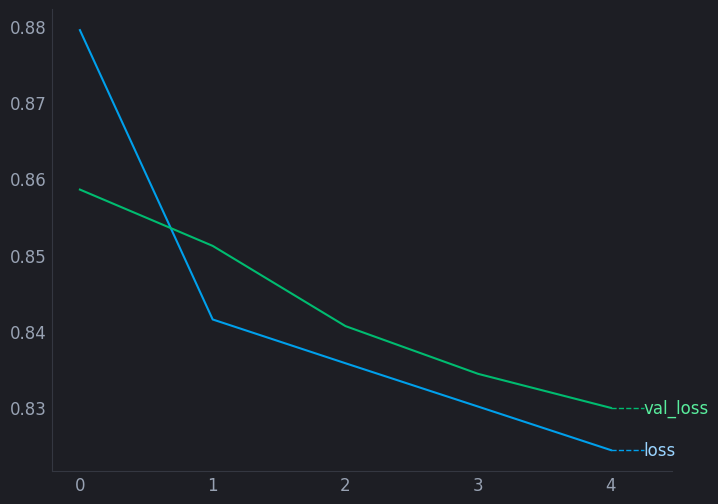

In [7]:
from keras.optimizers.schedules import PolynomialDecay

def fit(epochs=5, valid_split=0.2, batch_size=512):
    mod = SpeciesEnergyModel()
    mod([X[:64], y[:64]])

    steps_in_epoch = round((X.shape[0] * (1 - valid_split)) / (batch_size) + 0.5)

    decay_steps = steps_in_epoch * epochs

    def log_prob_loss(y_true, y_pred):
        return y_pred

    mod.compile(optimizer=keras.optimizers.Adam(
        learning_rate=PolynomialDecay(3e-2, decay_steps, end_learning_rate=1e-6), 
        global_clipnorm=3.0), loss=log_prob_loss)

    history = mod.fit([X, y], y * 0, batch_size=batch_size, epochs=epochs, validation_split=valid_split)

    pd.DataFrame(history.history).plot()
    rp.line_labels()
    
    return mod

mod = fit()

Epoch 1/5


3087/3087 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.9660 
Epoch 2/5
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 3s 934us/step - loss: 0.8453
Epoch 3/5
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 3s 934us/step - loss: 0.8400
Epoch 4/5
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 3s 939us/step - loss: 0.8330
Epoch 5/5
3087/3087 ━━━━━━━━━━━━━━━━━━━━ 3s 932us/step - loss: 0.8270


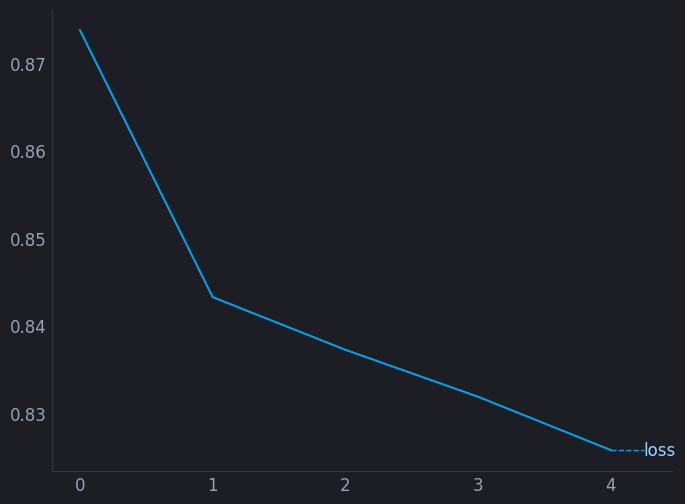

In [8]:
mod = fit(valid_split=0)

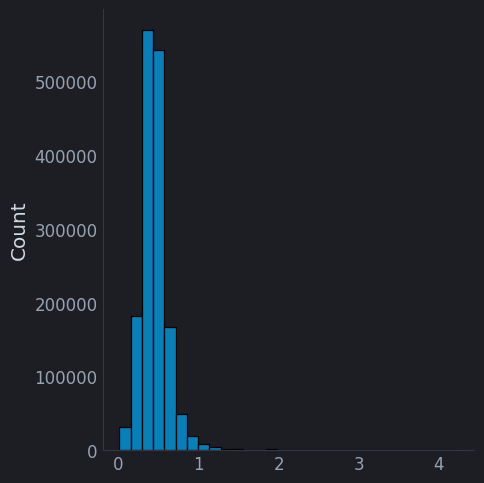

In [9]:
sns.displot(mod.predict_dist(X).scale, bins=30)

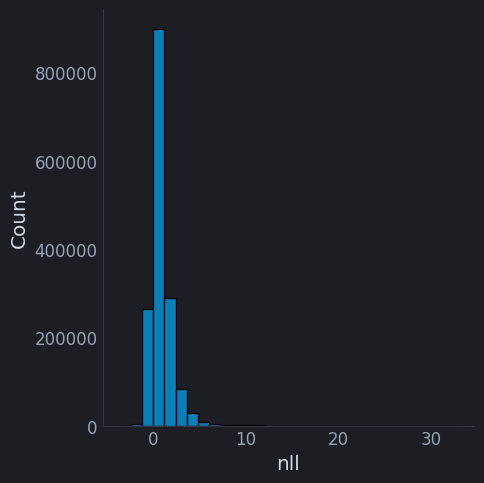

In [10]:
dists = mod.predict_dist(X)
df['loc'] = dists.loc
df['scale'] = dists.scale
df['resid'] = dists.loc-y
df['nll'] = -dists.log_prob(y.reshape(-1))

sns.displot(df['nll'], bins=30)
# xx = jnp.linspace(-10, 10, 1000)
# plt.plot(xx, jnp.exp(-jnp.abs(xx)))

In [11]:
worst = df.sort_values('resid').tail(10)
worst.loc[:, (worst != 0).any(axis=0)]

,Xe,energy,total_energy,loc,scale,resid,nll
1121174,4.0,-0.034494,-0.137975,9.903675,3.476301,9.938169,4.797950
1121019,4.0,-0.034627,-0.138507,9.903675,3.476301,9.938302,4.797988
1120895,4.0,-0.034680,-0.138719,9.903675,3.476301,9.938354,4.798003
211375,2.0,-0.034865,-0.069730,9.903675,3.545604,9.938540,4.761915
211406,2.0,-0.035285,-0.070570,9.903675,3.545604,9.938960,4.762033
651829,1.0,-0.035751,-0.035751,9.903675,4.013122,9.939425,4.559448
209608,2.0,-0.036016,-0.072033,9.903675,3.545604,9.939692,4.762240
651457,1.0,-0.036172,-0.036172,9.903675,4.013122,9.939847,4.559553
211344,2.0,-0.036175,-0.072350,9.903675,3.545604,9.939850,4.762284
651798,1.0,-0.036481,-0.036481,9.903675,4.013122,9.940156,4.559630


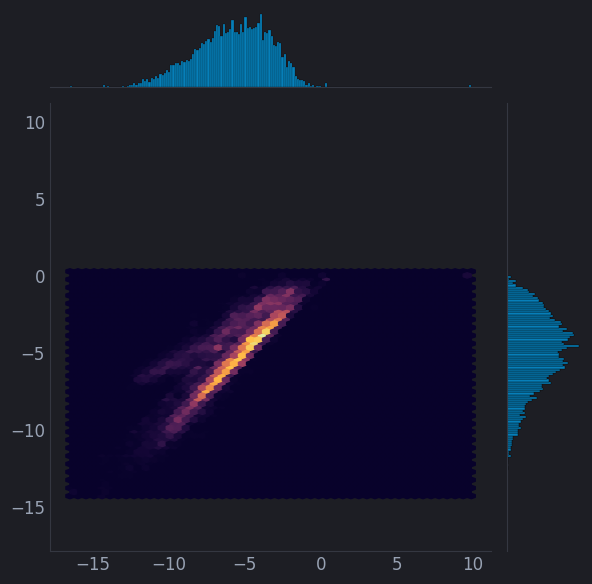

In [12]:
def show_error(mask):
    g = sns.jointplot(x=mod.predict_dist(X[mask]).loc.reshape(-1), y=y[mask], kind='hex', cmap='rho_heatmap')
    lo1, hi1 = g.ax_joint.get_xlim()
    lo2, hi2 = g.ax_joint.get_ylim()
    lim = (min(lo1, lo2), max(hi1, hi2))
    g.ax_joint.set_xlim(*lim)
    g.ax_joint.set_ylim(*lim)

show_error(num_atoms <= 4)

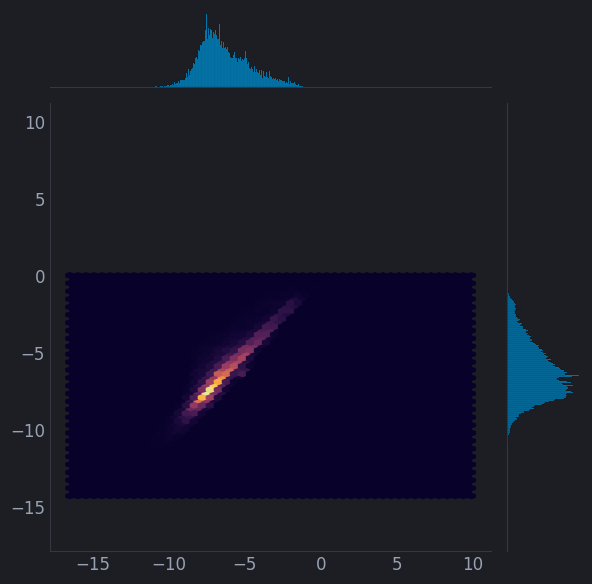

In [13]:
show_error(num_atoms >= 4)

In [14]:
data = {
    'scale': mod.scale.get_weights()[0].reshape(-1),
    'shift': mod.shift.get_weights()[0].reshape(-1),
    'global_scale': mod.global_scale.value,
    'global_shift': mod.global_shift.value,
}

@np.vectorize
def get_z(s):
    return Element(s).Z if s != '0' else 1000

atomic_scale = pd.Series(transform(data['scale'] + intercept).tolist(), index=df.columns[:len(data['scale'])])
atomic_scale.sort_values()

He    0.591439
Cr    0.982682
V     0.985981
Mn    0.986236
In    0.991387
        ...   
Ne    1.759451
Ar    1.951117
Xe    2.083391
Tc    2.156176
Kr    2.178326
Length: 90, dtype: float64

In [15]:
atomic_energies = pd.Series((data['shift'] + data['global_shift']).tolist(), index=atomic_scale.index).sort_index(key=get_z).iloc[:-1]
atomic_energies

H     -3.504902
He    -2.478767
Li    -3.116377
Be    -4.093473
B     -7.286745
        ...    
Th    -9.391665
Pa   -10.564468
U    -12.575358
Np   -13.069368
Pu   -14.260040
Length: 89, dtype: float64

In [16]:
import json
with open('data/sevennet_stats.json', 'r') as f:
    sevenstats = json.load(f)

energy_comp = pd.DataFrame({'new': atomic_energies.values.round(3), 
                            'scale': atomic_scale.sort_index(key=get_z).iloc[:-1].values.round(3), 
                            'seven': sevenstats['atomic_energies']}, index=atomic_energies.index)

energy_comp['abs_diff'] = energy_comp.eval('abs(new - seven)')
energy_comp.sort_values('abs_diff', ascending=False)

,new,scale,seven,abs_diff
Kr,-0.038,2.178,6.767,6.805
Ne,-5.419,1.759,0.000,5.419
Ar,-5.004,1.951,-0.063,4.941
W,-12.583,0.994,-9.355,3.228
Mo,-10.927,1.008,-8.792,2.135
...,...,...,...,...
C,-8.469,1.086,-8.406,0.063
Xe,9.904,2.083,9.847,0.057
Ge,-4.652,1.013,-4.708,0.056
Bi,-3.411,1.007,-3.439,0.028


<Axes: xlabel='new', ylabel='seven'>

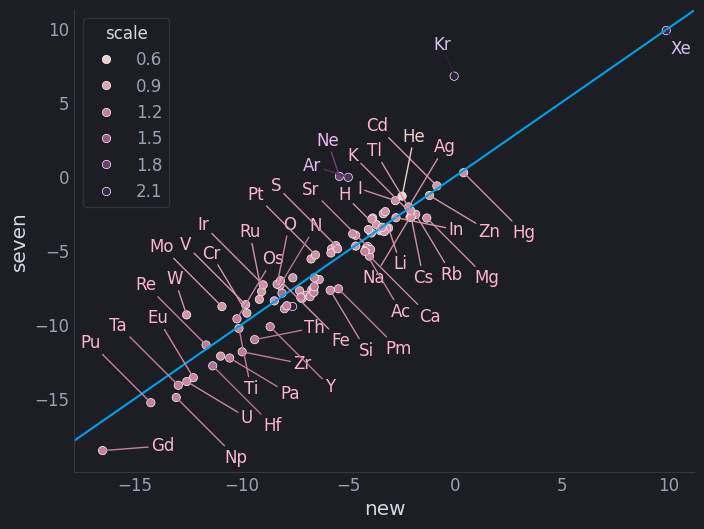

In [17]:
sns.scatterplot(energy_comp, x='new', y='seven', hue='scale')
plt.axline((0, 0), slope=1)
rp.scatter_labels(energy_comp.index)

In [18]:
from facet.utils import save_pytree


save_pytree(data, f'precomputed/{dataset}/stats.mpk')

In [19]:
from facet.utils import load_pytree


load_pytree(f'precomputed/{dataset}/stats.mpk')

{'scale': array([-2.40991106e-39,  1.33058935e-01,  2.93497473e-01,  2.61184499e-02,
         2.40968168e-01,  9.34929773e-02,  3.21534164e-02,  1.22204259e-01,
        -3.99079267e-03,  3.21241319e-02,  5.05398333e-01,  1.65204424e-02,
         1.08429275e-01,  1.10232485e-02, -2.18620170e-02, -2.22697780e-02,
        -2.75362208e-02,  1.05140291e-01,  2.78376997e-01,  2.12133881e-02,
         6.50004968e-02,  7.48609379e-02,  1.90245599e-01,  1.06534272e-01,
         3.27279478e-01,  2.27959231e-01,  2.23455299e-02,  4.60880756e-01,
         1.62185147e-01,  1.83875978e-01,  2.92971972e-02,  4.69289832e-02,
         1.18544335e-02,  3.74471620e-02,  1.70294091e-01,  1.80884063e-01,
         4.55600560e-01,  1.10464349e-01,  3.83205593e-01,  8.41733068e-02,
        -6.63747604e-04,  1.12307980e-03,  3.71447802e-01,  3.02267253e-01,
         1.66967139e-01,  2.51082033e-01,  1.04348332e-01,  8.47445428e-02,
         1.59817740e-01,  1.23538606e-01,  7.84063041e-02,  8.03675130e-03,
   

In [20]:
from facet.data.metadata import DatasetMetadata

kk = jnp.array(metadata['r_max_counts'])

ds_metadata = DatasetMetadata(
    dataset_name=dataset,
    supported_targets=('energy',),
    batches_per_group=jnp.array(metadata['batches_per_group'], dtype=jnp.uint32),
    batch_num_atoms=metadata['num_atoms'],
    nearest_k=metadata['k'],
    batch_num_graphs=metadata['num_batch'],
    shift_energy=data['global_shift'].item(),
    scale_energy=data['global_scale'].item(),
    atomic_numbers=jnp.array(metadata['atomic_numbers'], dtype=jnp.uint8),
    atomwise_scale_energy=jnp.array(data['scale']),
    atomwise_shift_energy=jnp.array(data['shift']),
    r_max_quantile_r=jnp.array(metadata['r_max_bins']),
    r_max_quantile_k=kk / kk.sum(axis=-1, keepdims=True)
)

ds_metadata

DatasetMetadata(dataset_name='mptrj', supported_targets=('energy',), batches_per_group=Array([ 906, 1425, 1409, 1425, 1438, 1440, 1436, 1440, 1422, 1430, 1445,
       1492, 1398, 1439, 1425, 1443, 1465, 1413, 1397, 1394, 1425, 1475,
       1492, 1430, 1388, 1445, 1411, 1460, 1491, 1433, 1451, 1420, 1464,
       1427, 1402, 1430], dtype=uint32), batch_num_atoms=32, nearest_k=48, batch_num_graphs=32, shift_energy=-6.198672771453857, scale_energy=2.3766870498657227, atomic_numbers=Array([ 0,  6, 17,  3,  8, 15, 51, 12, 26, 29, 21, 31, 37, 83, 25, 23, 24,
       16, 62, 32, 46, 34, 70, 19, 60,  9, 28,  7, 14, 20, 30, 52, 42, 27,
       56, 38, 72, 41, 39, 47, 48, 50, 90, 40, 92, 58, 45, 55, 13, 53, 33,
       82,  5, 22, 49, 11, 35, 78, 69, 73, 57, 93,  1, 94, 66, 77, 81,  4,
       74, 64, 63, 75, 43, 59, 79, 44, 68, 80, 65, 67, 76, 36, 91, 71, 61,
       54, 89, 10,  2, 18], dtype=uint8), atomwise_shift_energy=Array([  0.        ,  -2.2707615 ,   2.3401892 ,   3.0822957 ,
        -2.1390

In [26]:
ds_metadata.atomic_numbers

Array([ 0,  6, 17,  3,  8, 15, 51, 12, 26, 29, 21, 31, 37, 83, 25, 23, 24,
       16, 62, 32, 46, 34, 70, 19, 60,  9, 28,  7, 14, 20, 30, 52, 42, 27,
       56, 38, 72, 41, 39, 47, 48, 50, 90, 40, 92, 58, 45, 55, 13, 53, 33,
       82,  5, 22, 49, 11, 35, 78, 69, 73, 57, 93,  1, 94, 66, 77, 81,  4,
       74, 64, 63, 75, 43, 59, 79, 44, 68, 80, 65, 67, 76, 36, 91, 71, 61,
       54, 89, 10,  2, 18], dtype=uint8)

In [27]:
save_pytree(ds_metadata, f'precomputed/{dataset}/metadata.mpk')

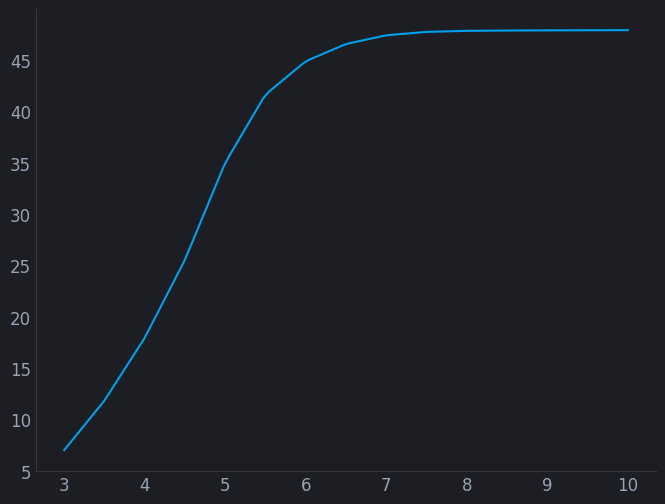

In [22]:
rr = jnp.linspace(3, 10, 100)

yy = ds_metadata.avg_num_neighbors(rr)

plt.plot(rr, yy)